# **Import Data**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Import data
legit = pd.read_csv("datasets/unb-university/Benign_list_big_final.csv")
phishing = pd.read_csv("datasets/unb-university/phishing_dataset.csv")

print(legit.head(2))
print(phishing.head(2))

  http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/
0  http://1337x.to/torrent/1110018/Blackhat-2015-...                                 
1  http://1337x.to/torrent/1122940/Blackhat-2015-...                                 
  http://v2.email-marketing.adminsimple.com/track/link?s=a879370e133bf6f71b5cc7ce0c2043e1&amp;AdministratorID=20238&amp;MemberID=21410&amp;CampaignID=1&amp;CampaignStatisticsID=1&amp;URL=http%3A%2F%2Fwww.cadivi.pro%2Faprobados%2Faprobados2012.php%3Futm_source%3Dv2.email-marketing.adminsimple.com
0  http://bid.openx.net/json?amp;amp;amp;amp;cid;...                                                                                                                                                                                                                                                    
1  http://webmail2.centurytel.net/hwebmail/servic...                                                                                                

In [45]:
legit.columns = ['url']
phishing.columns = ['url']

In [46]:
legit.head()

,url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


# **Prepare Data**

In [47]:
# Check null values
print(f"Legit set null values: {legit.isnull().sum()}")
print()
print(f"Phishing set null values: {phishing.isnull().sum()}")

Legit set null values: url    0
dtype: int64

Phishing set null values: url    0
dtype: int64


In [48]:
# Drop duplicates
print(f"Legit's duplicates num: {legit.duplicated().sum()}")
print(f"Phishing duplicates num: {phishing.duplicated().sum()}")

legit = legit.drop_duplicates()
phishing = phishing.drop_duplicates()
print()
print("After dropping duplicates")

print(f"Legit's duplicates num: {legit.duplicated().sum()}")
print(f"Phishing duplicates num: {phishing.duplicated().sum()}")

Legit's duplicates num: 0
Phishing duplicates num: 9

After dropping duplicates
Legit's duplicates num: 0
Phishing duplicates num: 0


In [49]:
# Check if there is imbalance
print(legit.shape)
print(phishing.shape)

(35377, 1)
(9955, 1)


In [50]:
# Add the right amount of phishing urls data from phishtank
phishtank = pd.read_csv('datasets/phishtank-phishing-urls.csv')

# Get the missing amount
legit_mal_diff = int(len(legit.index) - len(phishing.index))

# Randomly select the urls from phishtank dataset
phishtank = phishtank.sample(n=legit_mal_diff,random_state=42)
phishtank.shape

(25422, 1)

In [51]:
phishing_added = pd.concat([phishing, phishtank])

print(legit.shape)
print(phishing_added.shape)

(35377, 1)
(35377, 1)


In [52]:
# add a 'label' column to the dataframes
legit["label"] = 0
phishing_added["label"] = 1

In [53]:
# combine the two dataframes
df = pd.concat([legit, phishing_added], ignore_index=True)

# shuffle the dataframe's rows randomly
df = df.sample(frac=1, random_state=42) # Set random_state to an integer for reproducibility
df.reset_index(drop=True, inplace=True)

print(df.shape)

(70754, 2)


In [54]:
print(df.isnull().sum())
print(df.duplicated().sum())

url      0
label    0
dtype: int64
1


# **Extracting Features**

In [55]:
# importing required packages for this section
from urllib.parse import urlparse
import ipaddress
import re

from urllib.parse import urlparse, parse_qs

# Function to get the protocol (e.g., 'http', 'https') of a URL
def get_protocol(url):
    return len(urlparse(url).scheme)

# Function to get the subdomain (if present) of a URL
def get_subdomain(url):
    domain = urlparse(url).hostname
    if domain:
        parts = domain.split('.')
        if len(parts) > 2:
            return len('.'.join(parts[:-2]))
    return 0

# Function to get the domain (e.g., 'example') of a URL
def get_domain(url):
    domain = urlparse(url).hostname
    if domain:
        parts = domain.split('.')
        if len(parts) >= 2:
            return parts[-2]
    return None

# Function to get the top-level domain (TLD, e.g., 'com') of a URL
def get_tld(url):
    domain = urlparse(url).hostname
    if domain:
        parts = domain.split('.')
        if len(parts) >= 2:
            return len(parts[-1])
    return 0

# Function to get the subfolder (e.g., '/path/to/') of a URL
def get_subfolder(url):
    return len(urlparse(url).path)

# Function to get the slug (last part of the path, e.g., 'page.html') of a URL
def get_slug(url):
    path = urlparse(url).path
    if path:
        parts = path.split('/')
        if parts:
            return len(parts[-1])
    return 0

# Function to get the query parameters (e.g., {'param1': 'value1', 'param2': 'value2'}) of a URL
def get_parameters(url):
    return len(parse_qs(urlparse(url).query))



    

# Combine them in to one function
def featureExtraction(url,label):
    
    features = []
    features.append(url)
    #Address bar based features (10)
    features.append(get_protocol(url))
    features.append(get_subdomain(url))
    features.append(get_domain(url))
    features.append(get_tld(url))
    features.append(get_subfolder(url))
    features.append(get_slug(url))
    features.append(get_parameters(url))
    features.append(label)

    return features

In [56]:
# Example usage:
url = "https://www.example.com/path/to/page?param1=value1&param2=value2"
print("Protocol:", get_protocol(url))
print("Subdomain:", get_subdomain(url))
print("Domain:", get_domain(url))
print("TLD:", get_tld(url))
print("Subfolder:", get_subfolder(url))
print("Slug:", get_slug(url))
print("Parameters:", get_parameters(url))

Protocol: 5
Subdomain: 3
Domain: example
TLD: 3
Subfolder: 13
Slug: 4
Parameters: 2


In [57]:
features = []

for i in range(len(df)):
    url = df['url'][i]
    label = df['label'][i]
    features.append(featureExtraction(url,label))

In [58]:
feature_names = ['url', 'Protocol', 'Subdomain', 'Domain', 'TLD', 'Subfolder','Slug','Parameters', 'label']

df = pd.DataFrame(features, columns= feature_names)
df.head(5)

,url,Protocol,Subdomain,Domain,TLD,Subfolder,Slug,Parameters,label
0,http://mylust.com/videos/235749/japanese-anime...,4,0,mylust,3,84,0,0,0
1,https://qopesfd.freeddns.com/,5,7,freeddns,3,1,0,0,1
2,http://putlocker.is/watch-winning-the-racing-l...,4,0,putlocker,2,72,71,0,0
3,https://www-info-orico.mamabj.com/,5,14,mamabj,3,1,0,0,1
4,http://www.top4film.com/emsakiah/design/995a8e...,4,3,top4film,3,57,16,0,1


# **EDA**

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Protocol,70754.0,4.295220,0.456207,3.0,4.0,4.0,5.0,5.0
Subdomain,70754.0,6.506318,12.521103,0.0,0.0,0.0,8.0,229.0
TLD,70754.0,2.762077,0.576450,0.0,2.0,3.0,3.0,11.0
Subfolder,70754.0,47.146013,45.054095,0.0,8.0,40.0,76.0,778.0
Slug,70754.0,21.095698,36.120055,0.0,0.0,7.0,25.0,757.0
Parameters,70754.0,0.439382,1.201672,0.0,0.0,0.0,0.0,39.0
label,70754.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0


In [60]:
df.describe(include='object').T

,count,unique,top,freq
url,70754,70753,https://storage.cloud.google.com/1lordman1man3...,2
Domain,70754,13498,com,2368


array([[<Axes: title={'center': 'Protocol'}>,
        <Axes: title={'center': 'Subdomain'}>,
        <Axes: title={'center': 'TLD'}>],
       [<Axes: title={'center': 'Subfolder'}>,
        <Axes: title={'center': 'Slug'}>,
        <Axes: title={'center': 'Parameters'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

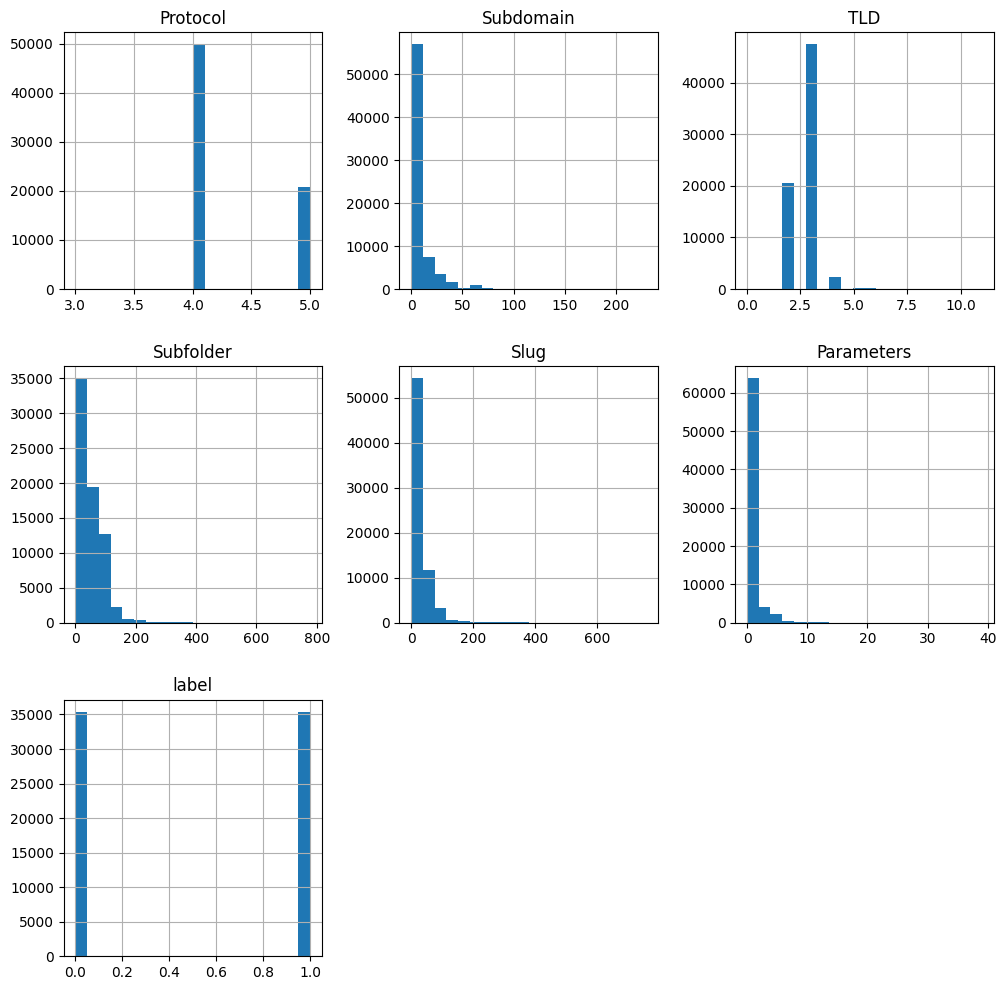

In [61]:
df.hist(figsize=(12,12),bins=20)

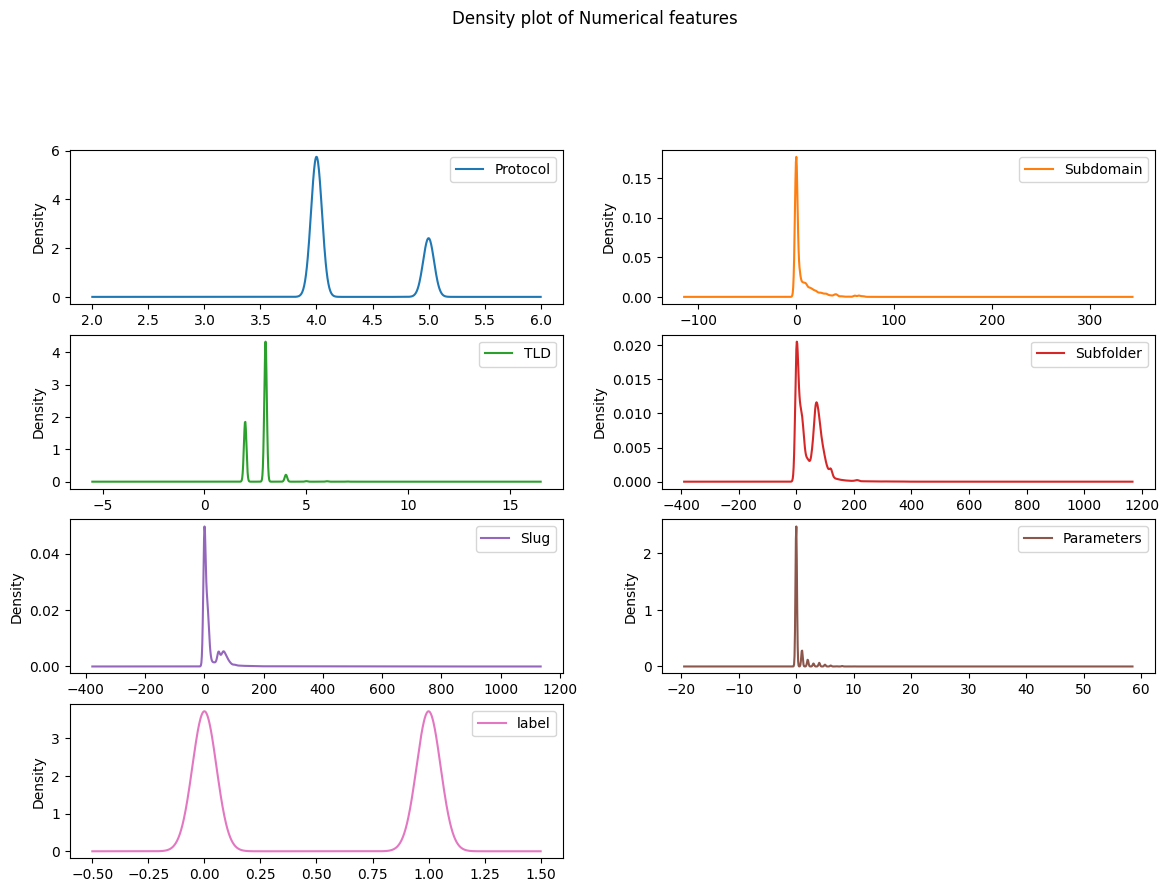

In [62]:
df.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

In [63]:
# Class distribution
class_distribution = df['label'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
label
0    35377
1    35377
Name: count, dtype: int64


# **Vectorizing and Labeling**

In [64]:
url_df = df['url']
domain_df = df['Domain']
feature_df = df[[ 'Protocol', 'Subdomain', 'TLD', 'Subfolder','Slug','Parameters']]
label_df = df['label']

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp
import numpy as np

# Vectorize URLs
vectorizer_url = CountVectorizer()
url_vec = vectorizer_url.fit_transform(url_df)

# Vectorize Domains
vectorizer_domain = CountVectorizer()
domain_vec = vectorizer_domain.fit_transform(domain_df)

# Convert other features to arrays
features_arr = np.asarray(feature_df)
scaler = StandardScaler()
features_arr_scaled = scaler.fit_transform(features_arr)

# Concatenate url_vec, domain_vec, and features_arr as sparse matrices
combined_features_arr = sp.hstack((url_vec, domain_vec, sp.csr_matrix(features_arr_scaled)), format='csr')

# Label to array
label_arr = np.asarray(label_df)

# **Train Test Split**

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(combined_features_arr, label_arr, test_size=0.5, random_state=42)

print('Train: ', x_train.shape[0])
print('Test: ', x_test.shape[0])

Train:  35377
Test:  35377


In [67]:
# Calculate the distribution of target labels in the training set
train_label_counts = {
    '0': (y_train == 0).sum(),
    '1': (y_train == 1).sum()
}

print('Train:')
print('Label 0 count:', train_label_counts['0'])
print('Label 1 count:', train_label_counts['1'])

Train:
Label 0 count: 17729
Label 1 count: 17648


# **Logistic Regression**

In [68]:
# modeling lbfgs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C= 0.001, class_weight= 'balanced', max_iter= 500, penalty= 'l2', random_state=42)
lr_lbfgs = logreg.fit(x_train,y_train)

In [69]:
y_pred_lr=logreg.predict(x_test)
print(y_pred_lr)

[0 0 1 ... 1 1 0]


In [70]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")

# Calculate f1 score
f1 = f1_score(y_test, y_pred_lr)
print(f"F1 score: {f1:.4f}")

# Calculate jaccard score
print(f"Jaccard score: {jaccard_score(y_test, y_pred_lr,pos_label=0):.4f}")


Accuracy: 0.9638
F1 score: 0.9637
Jaccard score: 0.9306


Text(0.5, 427.9555555555555, 'Predicted label')

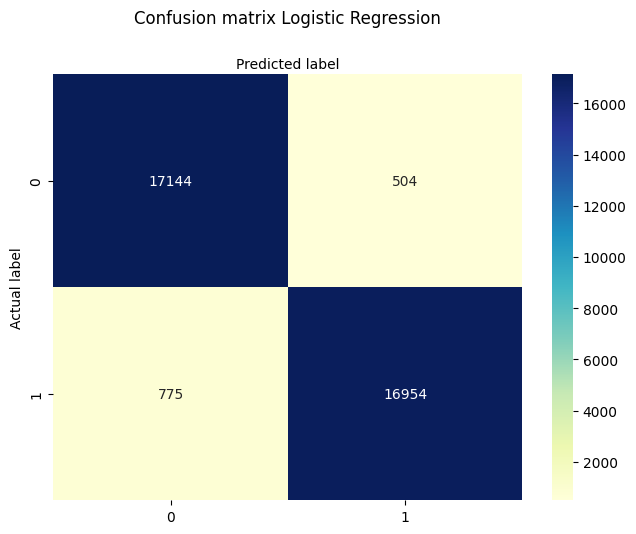

In [71]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Support Vector Machine**

In [72]:
from sklearn import svm

clf = svm.SVC()
clf_md = clf.fit(x_train, y_train)

In [73]:
y_pred_svm = clf.predict(x_test)

In [74]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")

# Calculate f1 score
f1 = f1_score(y_test, y_pred_svm)
print(f"F1 score: {f1:.4f}")

# Calculate jaccard score
print(f"Jaccard score: {jaccard_score(y_test, y_pred_svm,pos_label=0):.4f}")

Accuracy: 0.9968
F1 score: 0.9968
Jaccard score: 0.9936


Text(0.5, 427.9555555555555, 'Predicted label')

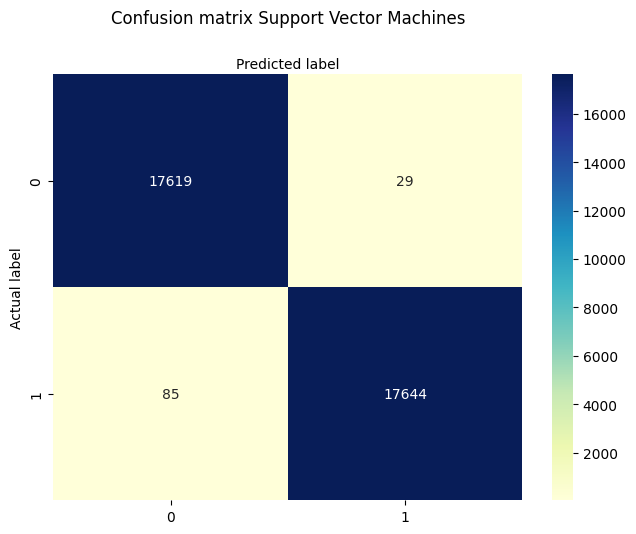

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Support Vector Machines', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Testing**

In [76]:
test_df = pd.read_csv('datasets/both-urls-dataset.csv')
test_df.head(3)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing


In [77]:
test = test_df[['url','status']]
test['status'] = test['status'].replace({'legitimate': 0, 'phishing': 1})

test.isnull().sum()
test.dropna()
#indexValue = test[test['y'] == 'continue=to&amp'].index
#test.drop(indexValue , inplace=True)
test.reset_index(drop=True, inplace=True)

test.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_4752\2647260676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['status'] = test['status'].replace({'legitimate': 0, 'phishing': 1})


(11430, 2)

In [78]:
x_t = test['url']
y_t = test['status'].astype(int)

features = []

for i in range(len(test)):
    url = x_t[i]
    label = y_t[i]
    features.append(featureExtraction(url,label))

#converting the list to dataframe
feature_names = ['url', 'Protocol', 'Subdomain', 'Domain', 'TLD', 'Subfolder','Slug','Parameters', 'label']
df = pd.DataFrame(features, columns= feature_names)

url_df = df['url']
domain_df = df['Domain']
feature_df = df[[ 'Protocol', 'Subdomain', 'TLD', 'Subfolder','Slug','Parameters']]
label_df = df['label']

In [79]:
# Vectorize URLs
url_vec = vectorizer_url.transform(url_df)

# Vectorize Domains
domain_vec = vectorizer_domain.transform(domain_df)

features_arr = np.asarray(feature_df)
features_arr_scaled = scaler.transform(features_arr)

combined_features_arr = sp.hstack((url_vec, domain_vec, sp.csr_matrix(features_arr_scaled)), format='csr')

y_t = np.asarray(label_df)

# Logistic regression

In [80]:
y_t_pred_lr = logreg.predict(combined_features_arr)

print(f"Jaccard score: {jaccard_score(y_t, y_t_pred_lr,pos_label=0):.2f}")

accuracy = accuracy_score(y_t, y_t_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_t, y_t_pred_lr)
print(f"F1 score: {f1:.2f}")

Jaccard score: 0.07
Accuracy: 0.49
F1 score: 0.64


Text(0.5, 427.9555555555555, 'Predicted label')

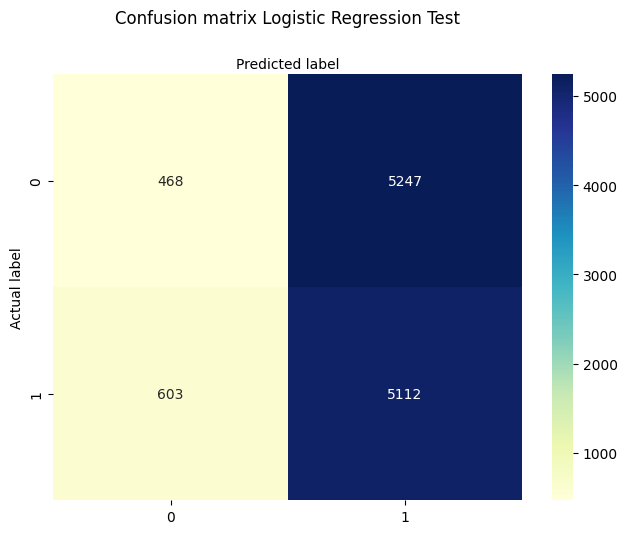

In [81]:
cnf_matrix = metrics.confusion_matrix(y_t, y_t_pred_lr)
cnf_matrix

class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SVM

In [82]:
y_t_pred_svm = clf.predict(combined_features_arr)

print(f"Jaccard score: {jaccard_score(y_t, y_t_pred_svm,pos_label=0):.2f}")

accuracy = accuracy_score(y_t, y_t_pred_svm)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_t, y_t_pred_lr)
print(f"F1 score: {f1:.2f}")

Jaccard score: 0.04
Accuracy: 0.50
F1 score: 0.64


Text(0.5, 427.9555555555555, 'Predicted label')

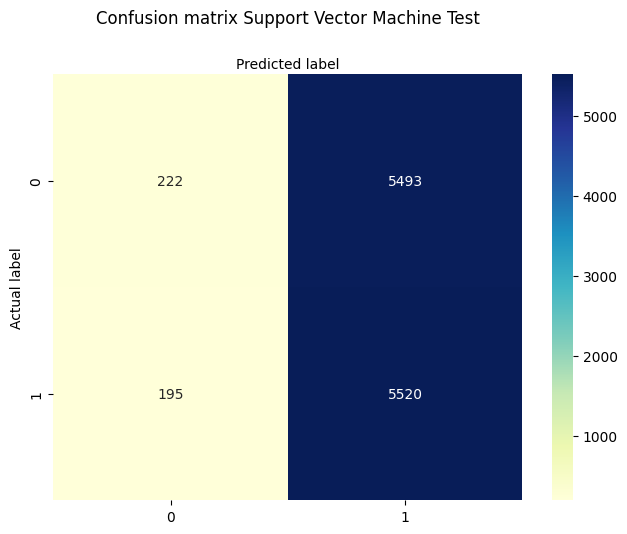

In [83]:
cnf_matrix = metrics.confusion_matrix(y_t, y_t_pred_svm)
cnf_matrix

class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Support Vector Machine Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')